# Seattle Bike Tutorial 

## Exploratory analysis of Seattle bike bridge data. 

Following : http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

Objective to get the hang of proper unit testing. Something I only briefly dabbled in.

In [1]:
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.style.use('seaborn-notebook')

In [4]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [ ]:
urlretrieve(URL,'Fremont.csv')

In [6]:
df = pd.read_csv(freemontCSV[0], index_col='Date', parse_dates=True)

In [7]:
df.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


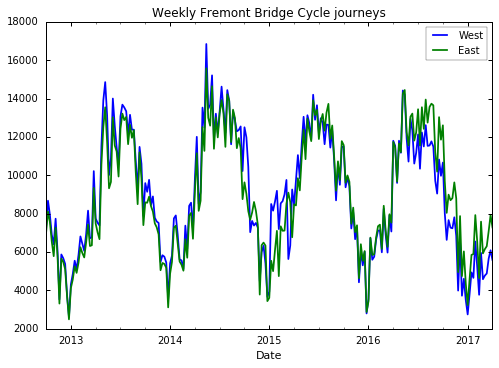

In [8]:
df.columns = ['West','East']
df.resample('W').sum().plot(title='Weekly Fremont Bridge Cycle journeys')

(0, 1100000.0)

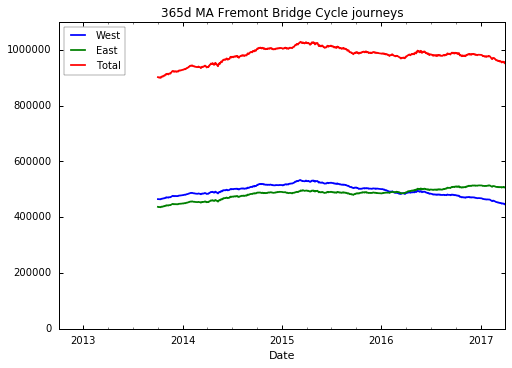

In [9]:
df['Total'] = df.West + df.East
ax = df.resample('D').sum().rolling(365).sum().plot(title='365d MA Fremont Bridge Cycle journeys')
ax.set_ylim(0)

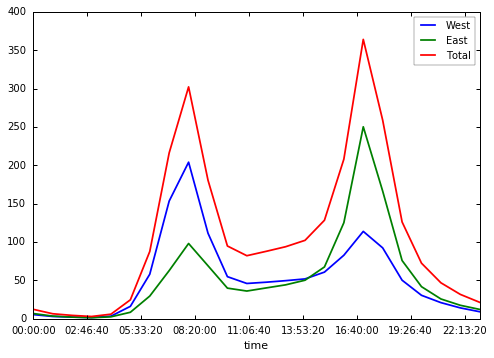

In [10]:
df.groupby(df.index.time).mean().plot()

In [11]:
pivoted = df.pivot_table('Total', index = df.index.time, columns = df.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


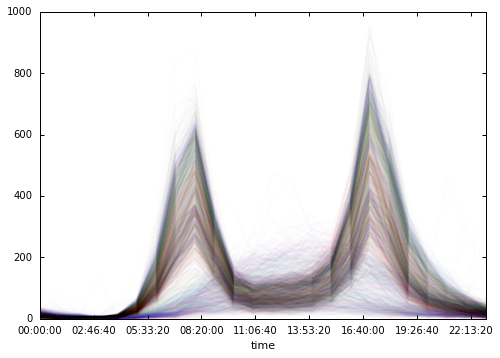

In [12]:
pivoted.plot(legend=False, alpha=0.01)